### Predicting Tesla Stock price using News Headlines and previous years stock prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### Stock Prices.csv

In [2]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
1,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700
2,2022-01-10,333.333344,353.033325,326.666656,352.706665,352.706665,91815000
3,2022-01-11,351.223328,358.616669,346.273346,354.799988,354.799988,66063300
4,2022-01-12,359.616669,371.613342,357.529999,368.739990,368.739990,83739000


In [3]:
df["Date"] = pd.to_datetime(df["Date"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,260.855445,267.189243,253.343825,259.851049,259.851049,8.807081e+07
std,58.558736,59.631613,57.460356,58.638150,58.638150,3.170015e+07
min,109.110001,111.750000,104.639999,108.099998,108.099998,4.186470e+07
25%,223.548333,229.158333,216.800003,223.015007,223.015007,6.685095e+07
50%,271.829987,277.579987,262.470001,268.433319,268.433319,8.253750e+07
75%,301.294998,308.786667,293.614990,301.656662,301.656662,9.797160e+07
max,378.766663,384.290009,362.433319,381.816681,381.816681,2.314028e+08


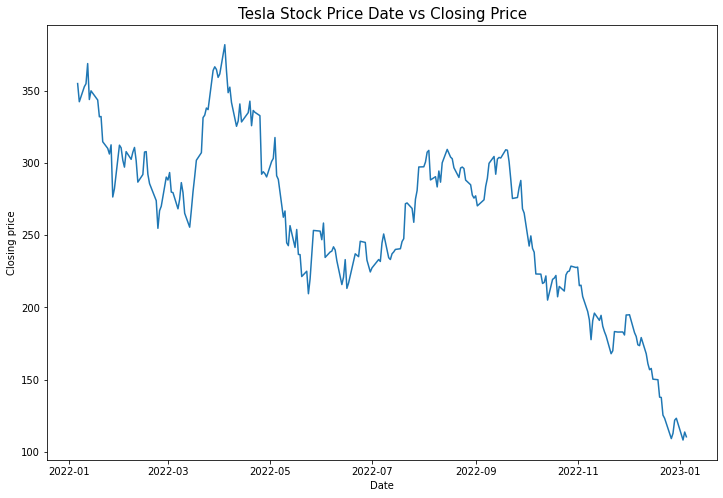

In [6]:
### Let us see dates vs closing price
plt.figure(figsize=(12,8))
plt.plot(df["Date"],df["Close"])
plt.title("Tesla Stock Price Date vs Closing Price",fontsize=15)
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.show()

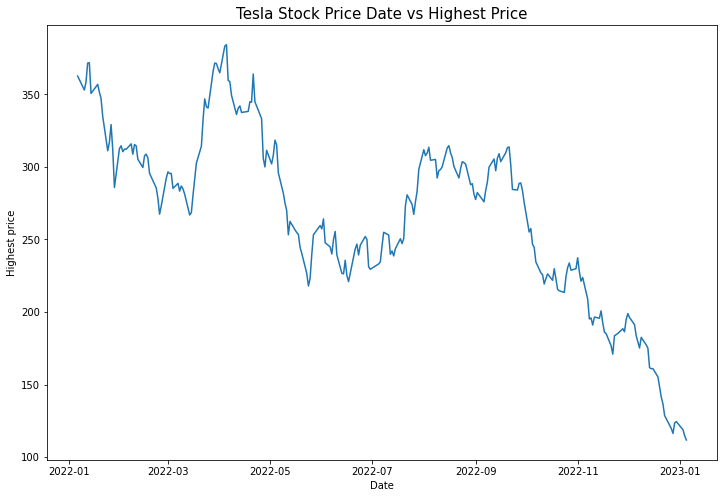

In [7]:
### Let us see dates vs closing price
plt.figure(figsize=(12,8))
plt.plot(df["Date"],df["High"])
plt.title("Tesla Stock Price Date vs Highest Price",fontsize=15)
plt.xlabel("Date")
plt.ylabel("Highest price")
plt.show()

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

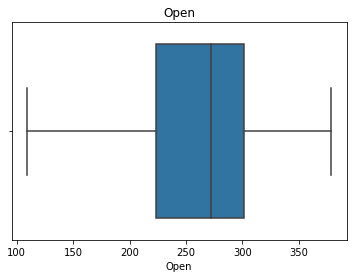

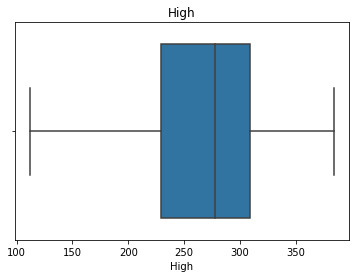

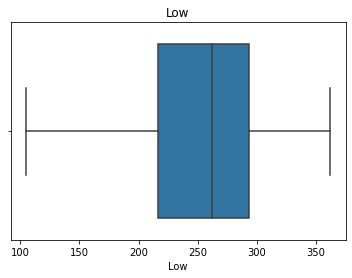

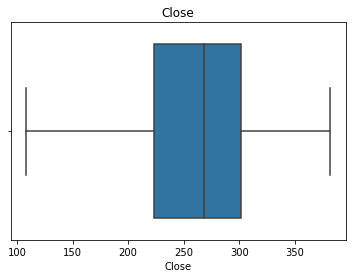

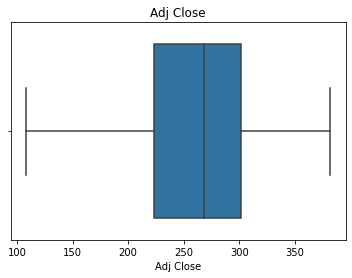

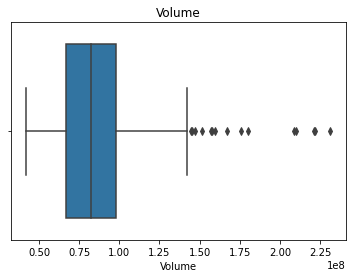

In [9]:
import seaborn as sns

for feature in df.columns:
    data = df.copy()
    if feature!='Date':
        sns.boxplot(x=df[feature])
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()

There are no much outliers. So, the dataset is almost clean and can be used for model building because: - 

1. No categorical values
2. No missing values
3. No outliers

### Importing the news dataset

In [10]:
### Let us import the new headlines dataset

df1 = pd.read_csv("india-news-headlines.csv")
df1.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [11]:
df1.shape

(3650970, 3)

In [12]:
df1 = df1.drop_duplicates('publish_date', keep='first').sort_index()
df1 = df1.reset_index()
df1

,index,publish_date,headline_category,headline_text
0,0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,86,20010103,unknown,Powerless north India gropes in the dark
2,127,20010104,unknown,The string that pulled Stephen Hawking to India
3,280,20010105,unknown,Light combat craft takes India into club class
4,406,20010106,unknown,Light combat craft takes India into club class
...,...,...,...,...
7712,3648472,20220327,entertainment.kannada.movies.news,Playing a dead man in Body God meant sitting i...
7713,3648972,20220328,life-style.spotlight,As fashion becomes democratic; demand for styl...
7714,3649472,20220329,entertainment.hindi.bollywood,Bobby Deol: Like my dad; I hope to be working ...
7715,3649972,20220330,entertainment.kannada.music,I will not give in to trends: Dossmode


In [13]:
city_df1 = df1[df1['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
city_df1

,index,publish_date,headline_category,headline_text
8,642,20010110,city.patna,Fend for yourselves; Pande tells doctors
48,2215,20010309,city.delhi,Maneka asks govt to take back land for cow she...
114,4563,20010522,city.pune,She turned and fought
116,4693,20010527,city.bengaluru,Need to boost exports; says bank head
118,4917,20010529,city.bengaluru,US visit won't be piece of cake for Krishna
...,...,...,...,...
7700,3642496,20220315,city.mumbai,Mumbaikars enjoy nightlife once more as restau...
7703,3643993,20220318,city.mumbai,Mumbai salons and spas deal with heavy demand ...
7707,3645983,20220322,city.patna,Sikta MLA pleads for police reform
7710,3647476,20220325,city.delhi,Speeding up; shortcuts and tackling unruly cus...


In [14]:
city_split = pd.DataFrame(columns=['City_Name'])
city_split['City_Name'] = city_df1.headline_category.str.split('.',expand=True)[1]
city_df1 = pd.concat([city_df1,city_split],axis=1)
city_df1.drop(columns=['headline_category'],axis=1,inplace=True)
city_df1.reset_index(inplace=True)
city_df1.drop(['level_0','index'],axis=1,inplace=True)
city_df1

,publish_date,headline_text,City_Name
0,20010110,Fend for yourselves; Pande tells doctors,patna
1,20010309,Maneka asks govt to take back land for cow she...,delhi
2,20010522,She turned and fought,pune
3,20010527,Need to boost exports; says bank head,bengaluru
4,20010529,US visit won't be piece of cake for Krishna,bengaluru
...,...,...,...
1412,20220315,Mumbaikars enjoy nightlife once more as restau...,mumbai
1413,20220318,Mumbai salons and spas deal with heavy demand ...,mumbai
1414,20220322,Sikta MLA pleads for police reform,patna
1415,20220325,Speeding up; shortcuts and tackling unruly cus...,delhi


### Storing Closing Stock

In [15]:
def new_dataset(df_prices2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(df_prices2)-look_back):
        a = df_prices2[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(df_prices2[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

df2 = pd.read_csv('TSLA.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

### Data Normalisation

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df2 = scaler.fit_transform(df2)

train_size = int(len(df2) * 0.80)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

look_back = 2
trainX, trainY = new_dataset(train, look_back)
testX, testY = new_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

### LSTM model

In [17]:
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [18]:
with tf.device("/device:GPU:0"):
    model = Sequential()
    model.add(LSTM(7, input_shape=(look_back,1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
7/7 [==============================] - 27s 8ms/step - loss: 0.4062
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 0.3752
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3458
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.3179
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2913
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2660
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2420
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2193
Epoch 9/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1972
Epoch 10/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1767
Epoch 11/200
7/7 [==============================] - 0s 6ms/step - loss: 0.1571
Epoch 12/200
7/7 [==============================] - 0s 5ms/step - loss: 0.1387
Epoch 13/200
7/7 [==============================] - 0s 5ms/s

In [19]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

2/2 [==============================] - 0s 4ms/step


In [20]:
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [21]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(df2), :] = testPredict

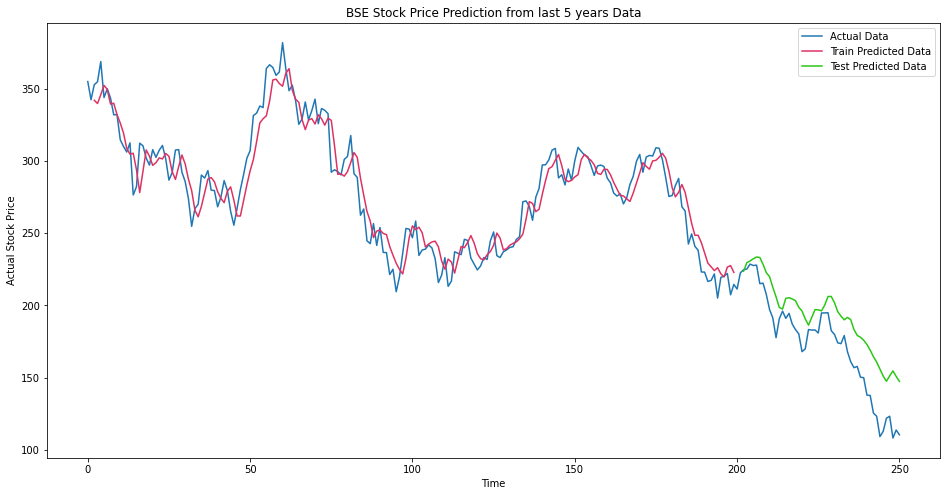

In [22]:
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df2), label = 'Actual Data')
plt.title('BSE Stock Price Prediction from last 5 years Data')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.plot(trainPredictPlot,color='#DE3163', label = 'Train Predicted Data')
plt.plot(testPredictPlot, color='#29c714', label = 'Test Predicted Data')
plt.legend(loc='best')
plt.show()

In [23]:
import math
from sklearn.metrics import mean_squared_error

In [24]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Training  = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Testing = ",testScore," RMSE")

Training  =  12.721115354388541  RMSE
Testing =  23.48939662939555  RMSE


### Textual Analysis

In [25]:
city_headline = city_df1.groupby(['City_Name']).agg({"headline_text":"count"})
city_headline.rename(columns={"headline_text":"Number_of_headline_text"},inplace=True)
city_headline = city_headline.sort_values(by='Number_of_headline_text',ascending=False)
top_15_headline_city = city_headline.head(15)
top_15_headline_city

,Number_of_headline_text
City_Name,
bengaluru,113
mumbai,94
delhi,84
ahmedabad,83
pune,78
hyderabad,75
patna,73
chandigarh,59
goa,57


### Top 15 cities which have high number of headline text

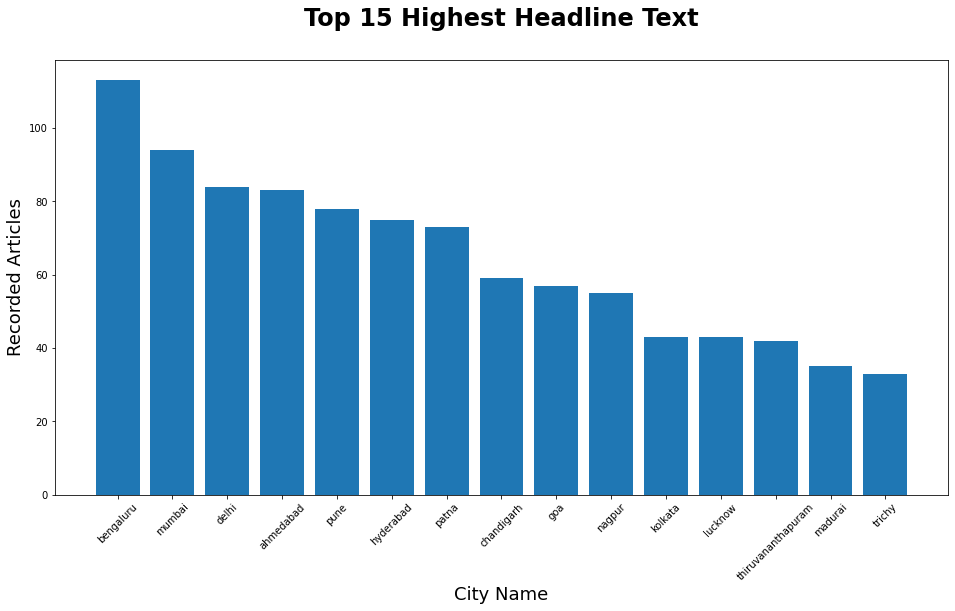

In [26]:
plt.figure(figsize=(16,8))
plt.bar(top_15_headline_city.index,height=top_15_headline_city['Number_of_headline_text'])
plt.xticks(rotation = 45)
plt.xlabel('City Name',fontsize=18)
plt.ylabel('Recorded Articles',fontsize=18)
plt.title('Top 15 Highest Headline Text\n',fontsize=24, fontweight='bold')
plt.show()

### Sentiment Analysis of Headline Text

In [27]:
from textblob import TextBlob
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [28]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [29]:
df1["Result"] = np.array([getAnalysis_polarity(headline) for headline in df1['headline_text']])

In [30]:
final_df1 = df1.groupby(['Result']).agg({'headline_text':'count'})
final_df1

,headline_text
Result,
negative,773
neutral,5113
positive,1831


In [31]:
negative = (final_df1.loc['negative']/len(df1))*100
neutral = (final_df1.loc['neutral']/len(df1))*100
positive = (final_df1.loc['positive']/len(df1))*100

In [32]:
print("Positive Headlines: - ", positive)
print("\n\nNegative Headlines: - ", negative)
print("\n\nUnbiasedHeadlines: - ", str(neutral))

Positive Headlines: -  headline_text    23.726837
Name: positive, dtype: float64


Negative Headlines: -  headline_text    10.016846
Name: negative, dtype: float64


UnbiasedHeadlines: -  headline_text    66.256317
Name: neutral, dtype: float64


### Let us plot in pie chart

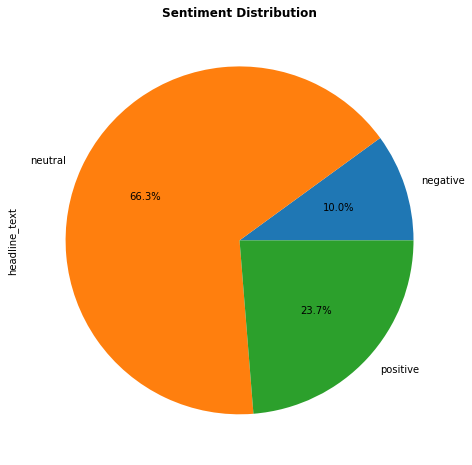

In [33]:
plt.figure(figsize=(12,8))
final_df1['headline_text'].plot.pie(autopct='%1.1f%%')
plt.title("Sentiment Distribution", fontweight = "bold")
plt.show()

### Hybrid Model

In [34]:
df_news = pd.read_csv("india-news-headlines.csv")
df_news["Date"] = pd.to_datetime(df_news["publish_date"], format="%Y%m%d")

In [35]:
df_news = df_news.drop(["publish_date"],axis=1)

In [36]:
df_prices = pd.read_csv("TSLA.csv")
df_prices["Date"] = pd.to_datetime(df_prices.Date,format="%Y-%m-%d")

In [37]:
df_prices.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [38]:
### Let us create a hybrid model

stocks_news_data = pd.merge(df_news,df_prices,how='inner',on="Date")
stocks_news_data

,headline_category,headline_text,Date,Open,High,Low,Close,Adj Close,Volume
0,astrology.horoscope,Horoscope Today; 6 January 2022: Check astrolo...,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
1,entertainment.kannada.movies.news,Dhanveerrah's next film to take off this month,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
2,entertainment.kannada.movies.news,Ek Love Ya release date pushed due to curfew; ...,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
3,entertainment.kannada.music,Vishwanath Haveri adds a touch of fusion to po...,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
4,tv.news.kannada,I love the unpredictable nature of the televis...,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
...,...,...,...,...,...,...,...,...,...
29427,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...,2022-03-31,364.856659,367.713318,358.880005,359.200012,359.200012,48992700
29428,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,2022-03-31,364.856659,367.713318,358.880005,359.200012,359.200012,48992700
29429,city.trichy,As Covid-19 cases drop to nil in southern dist...,2022-03-31,364.856659,367.713318,358.880005,359.200012,359.200012,48992700
29430,city.erode,Tamil Nadu sees marginal rise of Covid cases w...,2022-03-31,364.856659,367.713318,358.880005,359.200012,359.200012,48992700


In [39]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [40]:
stocks_news_data['sentiment'] = np.array([analysis_polarity(headline) for headline in stocks_news_data["headline_text"]])

In [41]:
senti_data = pd.get_dummies(stocks_news_data['sentiment'],drop_first=True)
stocks_news_data = pd.concat([stocks_news_data,senti_data],axis=1)
stocks_news_data.head()

,headline_category,headline_text,Date,Open,High,Low,Close,Adj Close,Volume,sentiment,neutral,positive
0,astrology.horoscope,Horoscope Today; 6 January 2022: Check astrolo...,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,negative,0,0
1,entertainment.kannada.movies.news,Dhanveerrah's next film to take off this month,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,neutral,1,0
2,entertainment.kannada.movies.news,Ek Love Ya release date pushed due to curfew; ...,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,positive,0,1
3,entertainment.kannada.music,Vishwanath Haveri adds a touch of fusion to po...,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,positive,0,1
4,tv.news.kannada,I love the unpredictable nature of the televis...,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,positive,0,1


### Subjectivity and Polarity Scores

In [42]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [43]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [44]:
stocks_news_data['Subjectivity'] =stocks_news_data['headline_text'].apply(getSubjectivity)
stocks_news_data['Polarity'] = stocks_news_data['headline_text'].apply(getPolarity)
stocks_news_data.head()

,headline_category,headline_text,Date,Open,High,Low,Close,Adj Close,Volume,sentiment,neutral,positive,Subjectivity,Polarity
0,astrology.horoscope,Horoscope Today; 6 January 2022: Check astrolo...,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,negative,0,0,0.3750,-0.125000
1,entertainment.kannada.movies.news,Dhanveerrah's next film to take off this month,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,neutral,1,0,0.0000,0.000000
2,entertainment.kannada.movies.news,Ek Love Ya release date pushed due to curfew; ...,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,positive,0,1,0.4875,0.187500
3,entertainment.kannada.music,Vishwanath Haveri adds a touch of fusion to po...,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,positive,0,1,0.5500,0.350000
4,tv.news.kannada,I love the unpredictable nature of the televis...,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,positive,0,1,0.8000,0.166667


### Plotting the Scores

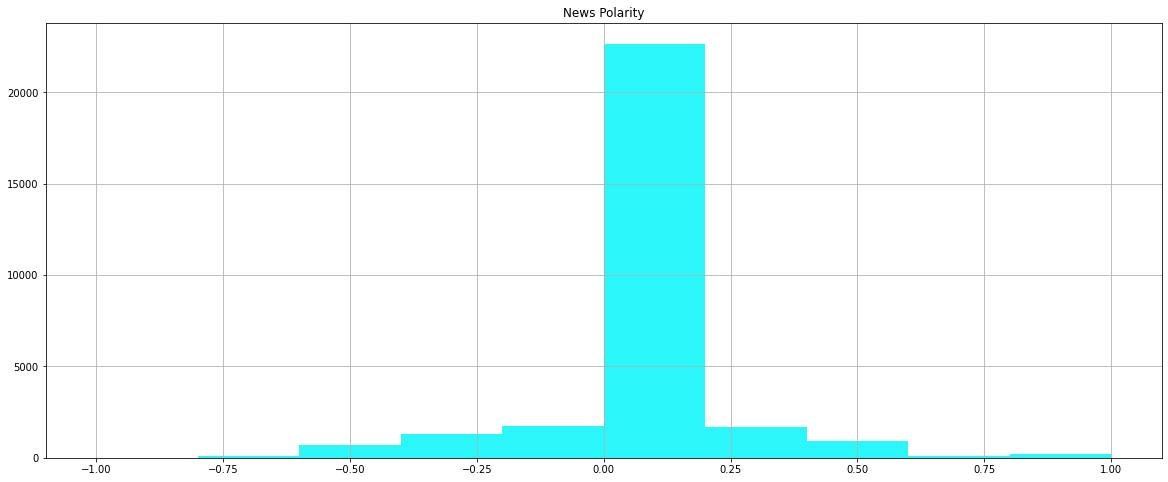

In [45]:
plt.figure(figsize=(20,8))
plt.title("News Polarity")
stocks_news_data['Polarity'].hist(color='#2BF6F9')
plt.show()

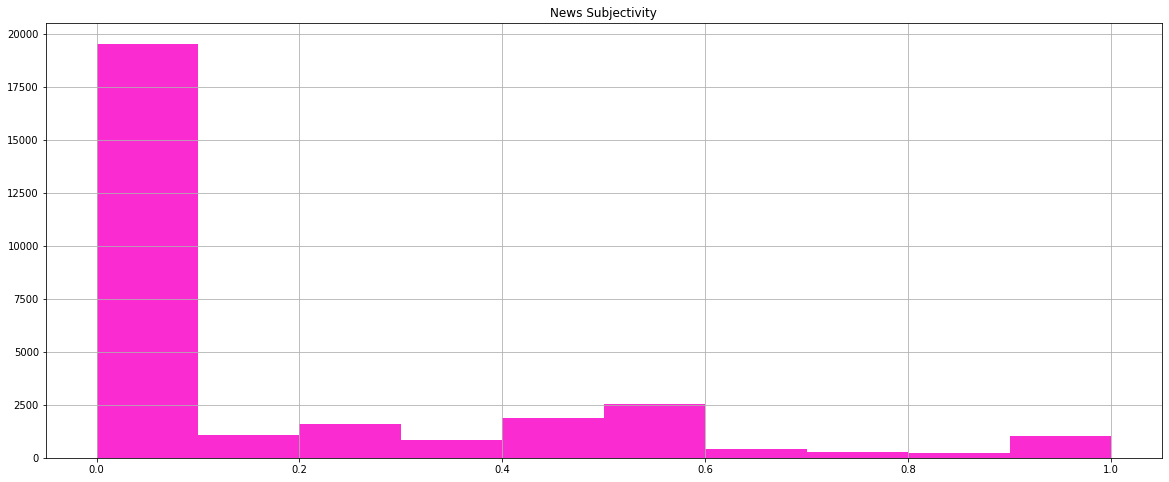

In [46]:
plt.figure(figsize = (20,8))
plt.title('News Subjectivity')
stocks_news_data['Subjectivity'].hist(color = '#F92BD1')
plt.show()

### Performing Sentiment Analysis

In [47]:
senti_int_an = SentimentIntensityAnalyzer()
stocks_news_data['Compound'] = [senti_int_an.polarity_scores(v)['compound'] for v in stocks_news_data['headline_text']]
stocks_news_data['Negative'] = [senti_int_an.polarity_scores(v)['neg'] for v in stocks_news_data['headline_text']]
stocks_news_data['Neutral'] = [senti_int_an.polarity_scores(v)['neu'] for v in stocks_news_data['headline_text']]
stocks_news_data['Positive'] = [senti_int_an.polarity_scores(v)['pos'] for v in stocks_news_data['headline_text']]
stocks_news_data.head()

,headline_category,headline_text,Date,Open,High,Low,Close,Adj Close,Volume,sentiment,neutral,positive,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,astrology.horoscope,Horoscope Today; 6 January 2022: Check astrolo...,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,negative,0,0,0.3750,-0.125000,-0.6597,0.227,0.773,0.000
1,entertainment.kannada.movies.news,Dhanveerrah's next film to take off this month,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,neutral,1,0,0.0000,0.000000,0.0000,0.000,1.000,0.000
2,entertainment.kannada.movies.news,Ek Love Ya release date pushed due to curfew; ...,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,positive,0,1,0.4875,0.187500,0.6369,0.000,0.704,0.296
3,entertainment.kannada.music,Vishwanath Haveri adds a touch of fusion to po...,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,positive,0,1,0.5500,0.350000,0.4215,0.000,0.833,0.167
4,tv.news.kannada,I love the unpredictable nature of the televis...,2022-01-06,359.0,362.666656,340.166656,354.899994,354.899994,90336600,positive,0,1,0.8000,0.166667,0.6369,0.000,0.724,0.276


In [48]:
req_col = ['Open', 'High', 'Low', 'Volume', 'Compound', 'Negative', 'Neutral', 'Positive', 'positive']

In [49]:
new_stocks = stocks_news_data[req_col]
new_stocks.reset_index(inplace = True)
new_stocks.rename(columns = {'positive':'Label'}, inplace = True)
new_stocks = new_stocks.loc[:,~new_stocks.columns.duplicated()]

C:\Users\Yogiraj\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
new_stocks

,index,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,0,359.000000,362.666656,340.166656,90336600,-0.6597,0.227,0.773,0.000,0
1,1,359.000000,362.666656,340.166656,90336600,0.0000,0.000,1.000,0.000,0
2,2,359.000000,362.666656,340.166656,90336600,0.6369,0.000,0.704,0.296,1
3,3,359.000000,362.666656,340.166656,90336600,0.4215,0.000,0.833,0.167,1
4,4,359.000000,362.666656,340.166656,90336600,0.6369,0.000,0.724,0.276,1
...,...,...,...,...,...,...,...,...,...,...
29427,29427,364.856659,367.713318,358.880005,48992700,-0.5267,0.274,0.726,0.000,0
29428,29428,364.856659,367.713318,358.880005,48992700,0.5106,0.000,0.852,0.148,1
29429,29429,364.856659,367.713318,358.880005,48992700,-0.2732,0.116,0.884,0.000,0
29430,29430,364.856659,367.713318,358.880005,48992700,0.0000,0.000,1.000,0.000,1


### Training and Testing the models for stock price

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = new_stocks.drop('Label', axis=1)    
y = new_stocks['Label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = None)

In [53]:
np.any(np.isnan(x_train))
np.all(np.isfinite(x_train))
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression()

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
model.fit(x_train,y_train)
y_logit_pred = model.predict(x_test)
accuracy_score(y_test,y_logit_pred)

0.8075420417869883

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
y_rf_pred = rf.predict(x_test)

In [61]:
accuracy_score(y_test,y_rf_pred)

0.7795141837948021

In [62]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [64]:
y_ada_pred = ada.predict(x_test)

In [65]:
accuracy_score(y_test,y_ada_pred)

0.8180737217598097

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
grad = GradientBoostingClassifier(n_estimators=100)
grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [69]:
y_grad_pred = grad.predict(x_test)

In [70]:
accuracy_score(y_test,y_grad_pred)

0.822320366910141

Let us save the model obtained from gradient boosting classifier since it has the highest accuracy.

In [72]:
import pickle as pkl
pkl.dump(grad, open('model.pkl', 'wb'))